In [1]:
import requests
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import pandas as pd

students = pd.read_csv("students.csv")
students.head()

,Full name,Sortable name,Canvas user id,Overall course grade,Assignment on time percent,Last page view time,Last participation time,Last logged out,Page Views,Participations,Email,SIS Id
0,Michael Edwards,"Edwards, Michael",168550000000002232,16.67,20.000000,"Oct 29, 2020","Oct 21, 2020",-,86,16,michael-edwards@lambdastudents.com,9d51c8f1-da0a-4e49-b598-62b63c26fd6a
1,Tevin Davis,"Davis, Tevin",168550000000001628,16.67,66.666667,"Oct 28, 2020","Oct 25, 2020",-,44,10,tevin-davis@lambdastudents.com,99157a50-1a43-4a25-a575-951140640d13
2,Russell Smith,"Smith, Russell",168550000000001657,66.67,64.285714,"Oct 25, 2020","Oct 25, 2020",-,75,22,russell-smith@lambdastudents.com,3138cc92-5269-4b67-b255-ef387aa27c19
3,Nick Verdina,"Verdina, Nick",168550000000001988,16.67,100.000000,"Oct 26, 2020","Oct 26, 2020",-,20,6,nick-verdina@lambdastudents.com,3e847d95-15bc-49e1-8c05-e9b71086c97e
4,Toni Darden,"Darden, Toni",168550000000002221,44.44,85.714286,"Oct 26, 2020","Oct 21, 2020",-,81,16,toni-darden@lambdastudents.com,56d07311-97b2-4aec-aaed-11f22aff1a88


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
api_key = os.getenv("API-KEY")
api_url = os.getenv("API-URL")
headers = {"Authorization":
           f"Bearer {api_key}"}

In [26]:
r = requests.get('https://lambdaschool.instructure.com/api/v1'
'/users/168550000000002221/', headers=headers)

In [20]:
with open("graded_subs.json", 'w') as outfile:
    json.dump(graded, outfile)

In [5]:
graded_df = pd.read_json('graded_subs.json')

In [6]:
graded_df

,id,body,url,grade,score,submitted_at,assignment_id,user_id,submission_type,workflow_state,grade_matches_current_submission,graded_at,grader_id,attempt,cached_due_date,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,posted_at,late,missing,seconds_late,entered_grade,entered_score,preview_url,anonymous_id,attachments
0,499907,None,None,0,0,NaT,9489,2221,None,graded,True,2020-12-07 08:25:16+00:00,NaN,NaN,2020-12-07T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-07 08:25:16+00:00,False,True,58598,0,0,https://lambdaschool.instructure.com/courses/5...,ofy3o,NaN
1,500054,None,None,0,0,NaT,9586,2221,None,graded,True,2020-12-03 08:16:55+00:00,NaN,NaN,2020-12-03T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-03 08:16:55+00:00,False,True,404198,0,0,https://lambdaschool.instructure.com/courses/5...,tYKND,NaN
2,187304,,https://github.com/Toniddarden/Sprint-Challeng...,0,0,2020-11-09 22:26:01+00:00,3533,2221,online_url,graded,True,2020-11-20 03:05:50+00:00,2995.0,1.0,2020-11-10T07:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 03:05:50+00:00,False,False,0,0,0,https://lambdaschool.instructure.com/courses/3...,78XmV,"[{'id': 73583, 'uuid': 'HrU6yXvNNAjvA9U9E5N9xF..."
3,187272,,https://github.com/Toniddarden/Graphs/tree/ton...,2,2,2020-10-27 00:40:04+00:00,3561,2221,online_url,graded,True,2020-11-20 02:53:58+00:00,2995.0,1.0,2020-10-27T06:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 02:53:58+00:00,False,False,0,2,2,https://lambdaschool.instructure.com/courses/3...,4gjvw,"[{'id': 49115, 'uuid': 'TeOXLvkPPMMqY7p7Jn98Lh..."
4,187312,None,None,0,0,NaT,2041,2221,None,graded,True,2020-11-10 08:29:05+00:00,NaN,NaN,2020-11-10T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-10 08:29:05+00:00,False,True,2391339,0,0,https://lambdaschool.instructure.com/courses/3...,Jen9e,NaN
5,187293,"user: 2221, quiz: 2744, score: 0.0, time: 2020...",None,0,0,2020-11-09 22:25:29+00:00,3390,2221,online_quiz,graded,True,2020-11-09 22:25:29+00:00,-2744.0,1.0,2020-11-10T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-09 22:25:29+00:00,False,False,0,0,0,https://lambdaschool.instructure.com/courses/3...,JDHew,NaN
6,187305,None,None,0,0,NaT,3535,2221,None,graded,True,2020-11-06 08:23:28+00:00,NaN,NaN,2020-11-06T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-06 08:23:28+00:00,False,True,2736940,0,0,https://lambdaschool.instructure.com/courses/3...,WvbZe,NaN
7,187298,None,None,0,0,NaT,3465,2221,None,graded,True,2020-11-06 08:23:28+00:00,NaN,NaN,2020-11-06T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-06 08:23:28+00:00,False,True,2736940,0,0,https://lambdaschool.instructure.com/courses/3...,nxgVS,NaN
8,187290,None,None,0,0,NaT,3359,2221,None,graded,True,2020-11-06 08:23:28+00:00,NaN,NaN,2020-11-06T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-06 08:23:28+00:00,False,True,2736940,0,0,https://lambdaschool.instructure.com/courses/3...,BK5rN,NaN
9,187345,None,None,0,0,NaT,2110,2221,None,graded,True,2020-11-06 08:23:28+00:00,NaN,NaN,2020-11-06T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-06 08:23:28+00:00,False,True,2736940,0,0,https://lambdaschool.instructure.com/courses/3...,d6Mni,NaN


In [14]:
missing = graded_df['submitted_at'].isna()
dates = graded_df['graded_at']

In [19]:
dates

0   2020-12-07 08:25:16+00:00
1   2020-12-03 08:16:55+00:00
2   2020-11-20 03:05:50+00:00
3   2020-11-20 02:53:58+00:00
4   2020-11-10 08:29:05+00:00
5   2020-11-09 22:25:29+00:00
6   2020-11-06 08:23:28+00:00
7   2020-11-06 08:23:28+00:00
8   2020-11-06 08:23:28+00:00
9   2020-11-06 08:23:28+00:00
Name: graded_at, dtype: datetime64[ns, UTC]

In [8]:
import matplotlib.pyplot as plt

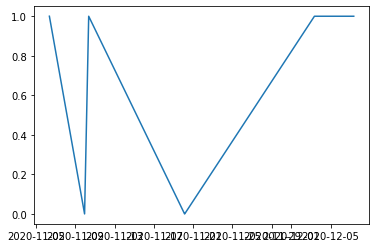

In [18]:
plt.plot(dates, missing)

In [67]:
r = requests.get('https://lambdaschool.instructure.com/api/v1'
'/users/168550000000002232/graded_submissions', headers=headers)
data_set = []

In [68]:
raw = r.json()

for submission in raw:
    data_set.append(submission)

In [69]:
data_set[0]

{'id': 499492,
 'body': 'user: 2232, quiz: 7795, score: 2.0, time: 2020-12-01 03:14:42 +0000',
 'url': None,
 'grade': '2',
 'score': 2.0,
 'submitted_at': '2020-12-01T03:14:42Z',
 'assignment_id': 9489,
 'user_id': 2232,
 'submission_type': 'online_quiz',
 'workflow_state': 'graded',
 'grade_matches_current_submission': True,
 'graded_at': '2020-12-01T03:14:42Z',
 'grader_id': -7795,
 'attempt': 1,
 'cached_due_date': '2020-12-07T07:59:00Z',
 'excused': None,
 'late_policy_status': None,
 'points_deducted': None,
 'grading_period_id': None,
 'extra_attempts': None,
 'posted_at': '2020-12-01T03:14:42Z',
 'late': False,
 'missing': False,
 'seconds_late': 0,
 'entered_grade': '2',
 'entered_score': 2.0,
 'preview_url': 'https://lambdaschool.instructure.com/courses/584/assignments/9489/submissions/2232?preview=1&version=1',
 'anonymous_id': '5UDGj'}

In [78]:
if "last" in r.links.keys():
    while r.links['current']['url']!=r.links['last']['url']:
        r = requests.get(r.links['next']['url'], headers=headers)

        raw = r.json()
        for submission in raw:
            data_set.append(submission)
else:
    r = requests.get(r.links['next']['url'])
    raw = r.json()
    for submission in raw:
        data_set.append(submission)

KeyError: 'next'

In [75]:
r.links

{'current': {'url': 'https://lambdaschool.instructure.com/api/v1/users/168550000000002232/graded_submissions?page=first&per_page=10',
  'rel': 'current'},
 'next': {'url': 'https://lambdaschool.instructure.com/api/v1/users/168550000000002232/graded_submissions?page=bookmark:WzE2ODU1LFsiMjAyMC0xMS0wMiAwMjozNDowMy4xNTg2NjIiLDE2NTI4NV1d&per_page=10',
  'rel': 'next'},
 'first': {'url': 'https://lambdaschool.instructure.com/api/v1/users/168550000000002232/graded_submissions?page=first&per_page=10',
  'rel': 'first'}}

In [55]:
import json
with open("graded_subs_2.json", "w") as outfile:
    json.dump(data_set, outfile)

In [56]:
grades_df = pd.read_json('graded_subs_2.json')
grades_df.head()

,id,body,url,grade,score,submitted_at,assignment_id,user_id,submission_type,workflow_state,grade_matches_current_submission,graded_at,grader_id,attempt,cached_due_date,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,posted_at,late,missing,seconds_late,entered_grade,entered_score,preview_url,anonymous_id,attachments
0,499907,None,None,0,0,NaT,9489,2221,None,graded,True,2020-12-07 08:25:16+00:00,NaN,NaN,2020-12-07T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-07 08:25:16+00:00,False,True,130158,0,0,https://lambdaschool.instructure.com/courses/5...,ofy3o,NaN
1,500054,None,None,0,0,NaT,9586,2221,None,graded,True,2020-12-03 08:16:55+00:00,NaN,NaN,2020-12-03T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-03 08:16:55+00:00,False,True,475758,0,0,https://lambdaschool.instructure.com/courses/5...,tYKND,NaN
2,187304,,https://github.com/Toniddarden/Sprint-Challeng...,0,0,2020-11-09 22:26:01+00:00,3533,2221,online_url,graded,True,2020-11-20 03:05:50+00:00,2995.0,1.0,2020-11-10T07:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 03:05:50+00:00,False,False,0,0,0,https://lambdaschool.instructure.com/courses/3...,78XmV,"[{'id': 73583, 'uuid': 'HrU6yXvNNAjvA9U9E5N9xF..."
3,187272,,https://github.com/Toniddarden/Graphs/tree/ton...,2,2,2020-10-27 00:40:04+00:00,3561,2221,online_url,graded,True,2020-11-20 02:53:58+00:00,2995.0,1.0,2020-10-27T06:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 02:53:58+00:00,False,False,0,2,2,https://lambdaschool.instructure.com/courses/3...,4gjvw,"[{'id': 49115, 'uuid': 'TeOXLvkPPMMqY7p7Jn98Lh..."
4,187312,None,None,0,0,NaT,2041,2221,None,graded,True,2020-11-10 08:29:05+00:00,NaN,NaN,2020-11-10T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-10 08:29:05+00:00,False,True,2462899,0,0,https://lambdaschool.instructure.com/courses/3...,Jen9e,NaN


In [58]:
grades_df.describe()

,id,grade,score,assignment_id,user_id,grader_id,attempt,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,seconds_late,entered_grade,entered_score
count,76.000000,76.000000,76.000000,76.000000,76.0,14.000000,14.000000,3.0,0.0,4.0,0.0,0.0,7.600000e+01,76.000000,76.000000
mean,195531.986842,0.223684,0.223684,3015.434211,2221.0,-1465.500000,1.071429,0.0,NaN,0.0,NaN,NaN,2.735620e+06,0.223684,0.223684
std,50383.605723,1.053232,1.053232,1273.942106,0.0,2432.947144,0.267261,0.0,NaN,0.0,NaN,NaN,1.922024e+06,1.053232,1.053232
min,187254.000000,0.000000,0.000000,2031.000000,2221.0,-2865.000000,1.000000,0.0,NaN,0.0,NaN,NaN,0.000000e+00,0.000000,0.000000
25%,187278.750000,0.000000,0.000000,2088.000000,2221.0,-2803.750000,1.000000,0.0,NaN,0.0,NaN,NaN,8.659250e+04,0.000000,0.000000
50%,187303.500000,0.000000,0.000000,3360.000000,2221.0,-2731.000000,1.000000,0.0,NaN,0.0,NaN,NaN,3.154243e+06,0.000000,0.000000
75%,187330.250000,0.000000,0.000000,3467.000000,2221.0,-1989.750000,1.000000,0.0,NaN,0.0,NaN,NaN,4.194644e+06,0.000000,0.000000
max,500054.000000,8.000000,8.000000,9586.000000,2221.0,2995.000000,2.000000,0.0,NaN,0.0,NaN,NaN,5.856045e+06,8.000000,8.000000


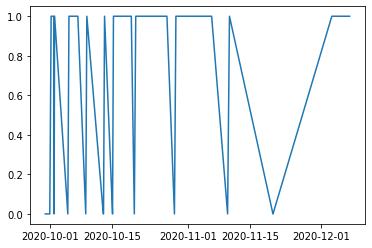

In [60]:
plt.plot(grades_df['graded_at'], grades_df['submitted_at'].isna())

In [5]:
r2 = requests.get('https://lambdaschool.instructure.com/api/v1'
'/users/168550000000002221/missing_submissions', headers=headers)

In [6]:
data_set2 = []

In [7]:
raw = r2.json()

for submission in raw:
    data_set2.append(submission)

In [8]:
if "last" in r2.links.keys():
    while r2.links['current']['url']!=r2.links['last']['url']:
        r2 = requests.get(r2.links['next']['url'], headers=headers)

        raw = r2.json()
        for submission in raw:
            data_set.append(submission)
else:
    r2 = requests.get(r2.links['next']['url'])
    raw = r2.json()
    for submission in raw:
        data_set.append(submission)

NameError: name 'r' is not defined

In [65]:
import json
with open("missing_subs.json", "w") as outfile:
    json.dump(data_set, outfile)

In [66]:
missing_df = pd.read_json("missing_subs.json")
missing_df.describe()

,id,grade,score,assignment_id,user_id,grade_matches_current_submission,grader_id,attempt,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,late,missing,seconds_late,entered_grade,entered_score,points_possible,assignment_group_id,grading_standard_id,peer_reviews,automatic_peer_reviews,position,grade_group_students_individually,anonymous_peer_reviews,group_category_id,post_to_sis,moderated_grading,omit_from_final_grade,intra_group_peer_reviews,anonymous_instructor_annotations,anonymous_grading,graders_anonymous_to_graders,grader_count,grader_comments_visible_to_graders,final_grader_id,grader_names_visible_to_final_grader,allowed_attempts,course_id,has_submitted_submissions,due_date_required,max_name_length,in_closed_grading_period,is_quiz_assignment,can_duplicate,original_course_id,original_assignment_id,original_assignment_name,original_quiz_id,muted,quiz_id,anonymous_submissions,published,only_visible_to_overrides,locked_for_user,post_manually,anonymize_students,require_lockdown_browser
count,97.000000,76.000000,76.000000,76.000000,76.0,76.0,14.000000,14.000000,3.0,0.0,4.0,0.0,0.0,76.000000,76.000000,7.600000e+01,76.000000,76.000000,21.000000,21.000000,0.0,21.0,21.0,21.000000,21.0,21.0,0.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,0.0,21.0,21.0,21.000000,21.0,21.0,21.0,21.0,21.000000,21.000000,0.0,0.0,0.0,0.0,21.0,17.000000,17.0,21.0,21.0,21.000000,21.0,21.0,21.0
mean,154147.360825,0.223684,0.223684,3015.434211,2221.0,1.0,-1465.500000,1.071429,0.0,NaN,0.0,NaN,NaN,0.052632,0.723684,2.735620e+06,0.223684,0.223684,1.190476,1031.380952,NaN,0.0,0.0,6.809524,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,-1.0,407.952381,1.0,0.0,255.0,0.0,0.571429,0.190476,NaN,NaN,NaN,NaN,1.0,3715.411765,0.0,1.0,0.0,0.857143,0.0,0.0,0.0
std,90814.185487,1.053232,1.053232,1273.942106,0.0,0.0,2432.947144,0.267261,0.0,NaN,0.0,NaN,NaN,0.224781,0.450146,1.922024e+06,1.053232,1.053232,3.249908,845.876497,NaN,0.0,0.0,5.510164,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,82.904449,0.0,0.0,0.0,0.0,0.507093,0.402374,NaN,NaN,NaN,NaN,0.0,2114.340620,0.0,0.0,0.0,0.358569,0.0,0.0,0.0
min,3348.000000,0.000000,0.000000,2031.000000,2221.0,1.0,-2865.000000,1.000000,0.0,NaN,0.0,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,642.000000,NaN,0.0,0.0,1.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,-1.0,375.000000,1.0,0.0,255.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,1.0,2702.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
25%,187260.000000,0.000000,0.000000,2088.000000,2221.0,1.0,-2803.750000,1.000000,0.0,NaN,0.0,NaN,NaN,0.000000,0.000000,8.659250e+04,0.000000,0.000000,0.000000,642.000000,NaN,0.0,0.0,3.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,-1.0,375.000000,1.0,0.0,255.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,1.0,2721.000000,0.0,1.0,0.0,1.000000,0.0,0.0,0.0
50%,187291.000000,0.000000,0.000000,3360.000000,2221.0,1.0,-2731.000000,1.000000,0.0,NaN,0.0,NaN,NaN,0.000000,1.000000,3.154243e+06,0.000000,0.000000,0.000000,642.000000,NaN,0.0,0.0,5.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,-1.0,375.000000,1.0,0.0,255.0,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,1.0,2798.000000,0.0,1.0,0.0,1.000000,0.0,0.0,0.0
75%,187323.000000,0.000000,0.000000,3467.000000,2221.0,1.0,-1989.750000,1.000000,0.0,NaN,0.0,NaN,NaN,0.000000,1.000000,4.194644e+06,0.000000,0.000000,1.000000,647.000000,NaN,0.0,0.0,10.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,-1.0,376.000000,1.0,0.0,255.0,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,1.0,2852.000000,0.0,1.0,0.0,1.000000,0.0,0.0,0.0
max,500054.000000,8.000000,8.000000,9586.000000,2221.0,1.0,2995.000000,2.000000,0.0,NaN,0.0,NaN,NaN,1.000000,1.000000,5.856045e+06,8.000000,8.000000,15.000000,3170.000000,NaN,0.0,0.0,24.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,-1.0,645.000000,1.0,0.0,255.0,0.0,1.000000,1.000000,NaN,NaN,NaN,NaN,1.0,8741.000000,0.0,1.0,0.0,1.000000,0.0,0.0,0.0


In [79]:
missing_df.head()

,id,body,url,grade,score,submitted_at,assignment_id,user_id,submission_type,workflow_state,grade_matches_current_submission,graded_at,grader_id,attempt,cached_due_date,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,posted_at,late,missing,seconds_late,entered_grade,entered_score,preview_url,anonymous_id,attachments,description,due_at,unlock_at,lock_at,points_possible,grading_type,assignment_group_id,grading_standard_id,created_at,updated_at,peer_reviews,automatic_peer_reviews,position,grade_group_students_individually,anonymous_peer_reviews,group_category_id,post_to_sis,moderated_grading,omit_from_final_grade,intra_group_peer_reviews,anonymous_instructor_annotations,anonymous_grading,graders_anonymous_to_graders,grader_count,grader_comments_visible_to_graders,final_grader_id,grader_names_visible_to_final_grader,allowed_attempts,lock_info,secure_params,course_id,name,submission_types,has_submitted_submissions,due_date_required,max_name_length,in_closed_grading_period,is_quiz_assignment,can_duplicate,original_course_id,original_assignment_id,original_assignment_name,original_quiz_id,muted,html_url,quiz_id,anonymous_submissions,published,only_visible_to_overrides,locked_for_user,lock_explanation,submissions_download_url,post_manually,anonymize_students,require_lockdown_browser
0,499907,None,None,0.0,0.0,NaT,9489.0,2221.0,None,graded,1.0,2020-12-07 08:25:16+00:00,NaN,NaN,2020-12-07T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-07 08:25:16+00:00,0.0,1.0,130158.0,0.0,0.0,https://lambdaschool.instructure.com/courses/5...,ofy3o,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500054,None,None,0.0,0.0,NaT,9586.0,2221.0,None,graded,1.0,2020-12-03 08:16:55+00:00,NaN,NaN,2020-12-03T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-03 08:16:55+00:00,0.0,1.0,475758.0,0.0,0.0,https://lambdaschool.instructure.com/courses/5...,tYKND,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187304,,https://github.com/Toniddarden/Sprint-Challeng...,0.0,0.0,2020-11-09 22:26:01+00:00,3533.0,2221.0,online_url,graded,1.0,2020-11-20 03:05:50+00:00,2995.0,1.0,2020-11-10T07:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 03:05:50+00:00,0.0,0.0,0.0,0.0,0.0,https://lambdaschool.instructure.com/courses/3...,78XmV,"[{'id': 73583, 'uuid': 'HrU6yXvNNAjvA9U9E5N9xF...",NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187272,,https://github.com/Toniddarden/Graphs/tree/ton...,2.0,2.0,2020-10-27 00:40:04+00:00,3561.0,2221.0,online_url,graded,1.0,2020-11-20 02:53:58+00:00,2995.0,1.0,2020-10-27T06:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 02:53:58+00:00,0.0,0.0,0.0,2.0,2.0,https://lambdaschool.instructure.com/courses/3...,4gjvw,"[{'id': 49115, 'uuid': 'TeOXLvkPPMMqY7p7Jn98Lh...",NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187312,None,None,0.0,0.0,NaT,2041.0,2221.0,None,graded,1.0,2020-11-10 08:29:05+00:00,NaN,NaN,2020-11-10T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-10 08:29:05+00:00,0.0,1.0,2462899.0,0.0,0.0,https://lambdaschool.instructure.com/courses/3...,Jen9e,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
